In [63]:
import matplotlib
import matplotlib.pyplot as plt
import pickle
import torch
import math

path0 = r"D:\Uni\BA\Development\Hillclimbing\hillclimbing_logs\linear\final\heuristics_comp\deterministic\cml\ba10_1k_restart_3.5_eval\2021-03-04T15_52_03.243298"
path1 = r"D:\Uni\BA\Development\Hillclimbing\hillclimbing_logs\linear\final\heuristics_comp\deterministic\cml\ba10_1k_restart_3.5_grad\2021-03-04T15_53_28.837904"
path2 = r"D:\Uni\BA\Development\Hillclimbing\hillclimbing_logs\linear\final\heuristics_comp\deterministic\cml\ba10_1k_restart_3.5_random\2021-03-04T15_54_10.394816"

fontsize = '16'
import matplotlib.pylab as pylab
params = {'legend.fontsize': fontsize,
          'figure.figsize': (10, 5),
         'axes.labelsize': fontsize,
         'axes.titlesize': fontsize,
         'xtick.labelsize': fontsize,
         'ytick.labelsize': fontsize}
pylab.rcParams.update(params)

## Visualize training progression

In [75]:
with open(path0+'/accs.pickle', 'rb') as f:
    accs0 = pickle.load(f)
with open(path0+'/losses.pickle', 'rb') as f:
    losses0 = pickle.load(f)
with open(path0+'/timestamps.pickle', 'rb') as f:
    timestamps0 = pickle.load(f)
with open(path1+'/accs.pickle', 'rb') as f:
    accs1 = pickle.load(f)
with open(path1+'/losses.pickle', 'rb') as f:
    losses1 = pickle.load(f)
with open(path1+'/timestamps.pickle', 'rb') as f:
    timestamps1 = pickle.load(f)

In [52]:
accs0=accs0[:50]
accs1=accs1[:50]
losses0=losses0[:50]
losses1=losses1[:50]

In [76]:
with open(path2+'/accs.pickle', 'rb') as f:
    accs2 = pickle.load(f)
with open(path2+'/losses.pickle', 'rb') as f:
    losses2 = pickle.load(f)
with open(path2+'/timestamps.pickle', 'rb') as f:
    timestamps2 = pickle.load(f)

In [77]:
path3 = r"D:\Uni\BA\Development\Hillclimbing\hillclimbing_logs\linear\final\heuristics_comp\deterministic\cml\ba10_1k_restart_3.5_random\2021-03-04T15_54_10.394816\2021-03-04T16_53_27.475522"
with open(path3+'/accs.pickle', 'rb') as f:
    accs3 = pickle.load(f)
with open(path3+'/losses.pickle', 'rb') as f:
    losses3 = pickle.load(f)
print(accs2+accs3)
accs_c = accs2+accs3[1:]
losses_c = losses2+losses3[1:]
for i in range(50):
    accs1.append(accs1[-1])
    accs0.append(accs0[-1])
    losses1.append(losses1[-1])
    losses0.append(losses0[-1])
print(len(accs1))
print(len(accs_c))

[0.4444444444444444, 0.4444444444444444, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.48888888888888893, 0.5111111111111111, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5777777777777777, 0.5777777777777777, 0.5777777777777777, 0.5777777777777777, 0.6, 0.6222222222222222, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6222222222222222, 0.6222222222222222, 0.6222222222222222, 0.6222222222222222, 0.6222222222222222, 0.6222222222222222, 0.6222222222222222, 0.6444444444444444, 0.6444444444444444, 0.6444444444444444, 0.6666666666666667, 0.6666666666666667, 0.6888888888888889, 0.6888888888888889, 0.7111111111111111, 0.7333333333333334, 0.7333333333333334, 0.7555555555555555, 0.7555555555555555, 0.7777777777777778, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555

In [3]:
def truncate_float(num, decimals=0):
    factor = 10.0 ** decimals
    return math.trunc(factor*num) / factor

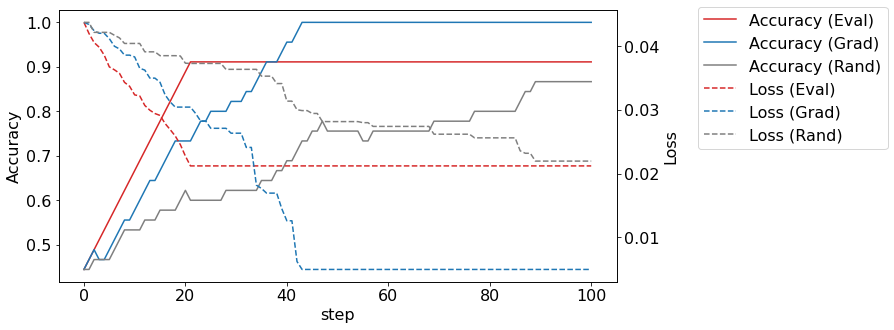

In [79]:
accs2=accs_c
losses2=losses_c
x0 = range(len(accs0))
x1 = range(len(accs1))
x2 = range(len(accs2))
fig, ax1 = plt.subplots()

ax1.set_xlabel('step')
ax1.set_ylabel('Accuracy')
ax2 = ax1.twinx()
ax2.set_ylabel('Loss')

lns1 = ax1.plot(x0, accs0, label='Accuracy (Eval)', color='tab:red')
lns2 = ax2.plot(x0, losses0, label='Loss (Eval)', color= 'tab:red', linestyle='dashed')
lns3 = ax1.plot(x1, accs1, label='Accuracy (Grad)', color='tab:blue')
lns4 = ax2.plot(x1, losses1, label='Loss (Grad)', color='tab:blue', linestyle='dashed')
lns5 = ax1.plot(x2, accs2, label='Accuracy (Rand)', color='tab:gray')
lns6 = ax2.plot(x2, losses2, label='Loss (Rand)', color='tab:gray', linestyle='dashed')

#ax1.set_ylim([0.1,0.9])
#ax2.set_ylim([0.314, 0.335])
# merge legends
#lns = lns1+lns3+lns2+lns4
lns =lns1+lns3+lns5+lns2+lns4+lns6  
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='center right', bbox_to_anchor=[1.5, 0.75])

fig.patch.set_facecolor('xkcd:white')
#fig.suptitle('Max accuracy: ' + str(truncate_float(max(accs), 5)) + 
#             '\nFinal accuracy: ' + str(truncate_float(accs[-1], 5)) +
#             '\nTime needed: ' + str(truncate_float(timestamps[-1] / 60, 3)) + ' minutes', y = 1.05)

time_eval = timestamps0[-1] / len(timestamps0)
time_grad = timestamps1[-1] / len(timestamps1)
time_rand = timestamps2[-1] / len(timestamps2)

#time_string = 'Mean runtime per step:\nEval: {:.4f}s\nGrad: {:.4f}s\nRand: {:.4f}s'.format(time_eval,time_grad,time_rand)
#fig.text(1.02, 0.2, time_string, fontsize=fontsize, linespacing=1.5)

plt.show()

In [80]:
fig.savefig(r'.\tracker_figures\final\heuristics_comp\deterministic/CML_ba10_1k_3.5.png', bbox_inches='tight', pad_inches=0.5, dpi=300)

In [19]:
timestamps[120] / 60
#accs[169]

11.9347201239

In [11]:
val, ind = torch.FloatTensor(losses).min(dim=0)
print(ind)
print(accs[ind])
print(tprs[ind])
print(fprs[ind])

tensor(169)
0.9368421052631579
0.9444444444444444
0.06493506493506493


### Dataset truncation

In [60]:
with open(r'D:\Uni\BA\Development\data\cml\timeseries_cml10_50k.pickle', 'rb') as f:
    series = pickle.load(f)
trunc_series = series[:1000]
print(trunc_series)
with open(r'D:\Uni\BA\Development\data\cml\timeseries_cml10_1000.pickle', 'wb') as f:
    pickle.dump(trunc_series, f)

tensor([[[[0.6164],
          [0.7888],
          [0.6303],
          ...,
          [0.7309],
          [0.7239],
          [0.6820]],

         [[0.8603],
          [0.4750],
          [0.8596],
          ...,
          [0.4693],
          [0.8649],
          [0.4579]],

         [[0.8602],
          [0.4759],
          [0.8600],
          ...,
          [0.4688],
          [0.8651],
          [0.4586]],

         ...,

         [[0.8700],
          [0.4345],
          [0.8640],
          ...,
          [0.4483],
          [0.8694],
          [0.4350]],

         [[0.5030],
          [0.8524],
          [0.4884],
          ...,
          [0.8497],
          [0.5027],
          [0.8526]],

         [[0.4590],
          [0.8725],
          [0.4273],
          ...,
          [0.8589],
          [0.4636],
          [0.8736]]],


        [[[0.8396],
          [0.4889],
          [0.8988],
          ...,
          [0.3786],
          [0.8442],
          [0.4792]],

         [[0.8468],
    